<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import statistics as stat
import random as r
import matplotlib.pyplot as plt

In [10]:
my_list = [1, 4, 8, 12, 22, 33, 12, 9, 1, 8]
my_list2 = [1, 4, 8, 12, 22, 33, 12, 9, 9, 0]

print(f'List n.1 mean: {stat.mean(my_list)}, list n.2 mean: {stat.mean(my_list2)}')
print(f'List n.1 mode: {stat.mode(my_list)}, list n.2 mode: {stat.mode(my_list2)}')
print(f'List n.1 median: {stat.median(my_list)}, list n.2 median: {stat.median(my_list2)}') #Lists are the same?

List n.1 mean: 11, list n.2 mean: 11
List n.1 mode: 1, list n.2 mode: 12
List n.1 median: 8.5, list n.2 median: 9.0


In [11]:
m = stat.mean(my_list)

In [15]:
#Manual calculation

variance = sum((x - m) ** 2 for x in my_list) / len(my_list)
print(f'Variance of list: {variance}')

Variance of list: 87.8


In [16]:
#Using function

variance2 = stat.pvariance(my_list2)
print(f'Variance of list: {variance2}')

Variance of list: 89.4


In [17]:
if(variance!=variance2):
  print('There is a differance in variances between these two lists.')
else:
  print('There is no differance in variances between these two lists.')

There is a differance in variances between these two lists.


In [18]:
#pvariances for popluation /N
#variances for probe /(n-1)

variance =  stat.variance(my_list)
pvariance =  stat.pvariance(my_list)

print(f'Variance for my_list = {variance}')
print(f'Pvariance for my_list = {pvariance}')

Variance for my_list = 97.55555555555556
Pvariance for my_list = 87.8


In [33]:
#generate random numbers for a list
rand_list = [r.randint(1, 250) for x in range(200)]
variance_list = stat.pvariance(rand_list)
rand_list = pd.DataFrame(rand_list)

variance = []
pvariance = []

for i in range(1, 101):
  probe = rand_list.sample(frac = i/100).squeeze()
  variance.append(stat.variance(probe))
  pvariance.append(stat.pvariance(probe))

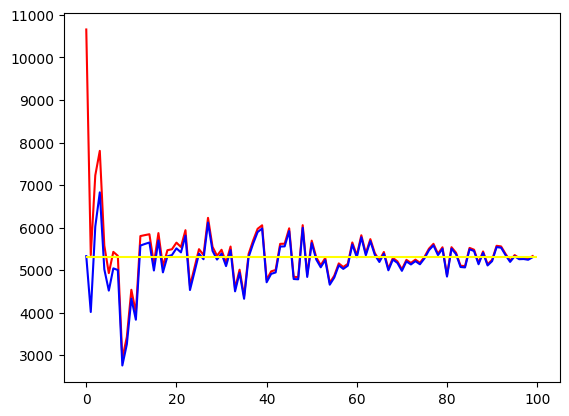

In [35]:
plt.plot(variance, color = 'red')
plt.plot(pvariance, color = 'blue')
plt.hlines(xmin = 0, xmax = 100, y = variance_list, linestyles='solid', color = 'yellow')

In [41]:
from math import sqrt
my_list = [r.randint(0,101) for i in range(200)]
my_list3 = [x * 2 for x in my_list]
my_list2 = [x * 2 + 2 for x in my_list]
my_list4 = [sqrt(x) for x in my_list]

print('Population variance - random numbers', stat.pvariance(my_list))
print('Population variance - plus 2 ', stat.pvariance(my_list2))
print('Population variance - multi 2 ', stat.pvariance(my_list3))
print('Population variance - root square', stat.pvariance(my_list4))


print('Coefficient of varation - random numbers', stat.pvariance(my_list)/stat.mean(my_list))
print('Coefficient of varation - plus 2 ', stat.pvariance(my_list2)/stat.mean(my_list2))
print('Coefficient of varation - multi 2 ', stat.pvariance(my_list3)/stat.mean(my_list3))
print('Coefficient of varation - root square', stat.pvariance(my_list4)/stat.mean(my_list4))

Population variance - random numbers 875.2136
Population variance - plus 2  3500.8544
Population variance - multi 2  3500.8544
Population variance - root square 5.551266192956387
Coefficient of varation - random numbers 17.476309904153357
Coefficient of varation - plus 2  34.2683476898982
Coefficient of varation - multi 2  34.952619808306714
Coefficient of varation - root square 0.8319014476260688


In [61]:
df = pd.DataFrame(columns=["List", "Variance", "Stdev","Coefficient of variation"])
df.loc[len(df)] = ['my_list', stat.variance(my_list), stat.stdev(my_list), stat.variance(my_list)/stat.mean(my_list)]
df.loc[len(df)] = ['my_list2', stat.variance(my_list2), stat.stdev(my_list2), stat.variance(my_list2)/stat.mean(my_list2)]
df.loc[len(df)] = ['my_list3', stat.variance(my_list3), stat.stdev(my_list3), stat.variance(my_list3)/stat.mean(my_list3)]
df.loc[len(df)] = ['my_list4', stat.variance(my_list4), stat.stdev(my_list4), stat.variance(my_list4)/stat.mean(my_list4)]

df

,List,Variance,Stdev,Coefficient of variation
0,my_list,879.611658,29.658248,17.564131
1,my_list2,3518.446633,59.316495,34.440550
2,my_list3,3518.446633,59.316495,35.128261
3,my_list4,5.579162,2.362025,0.836082


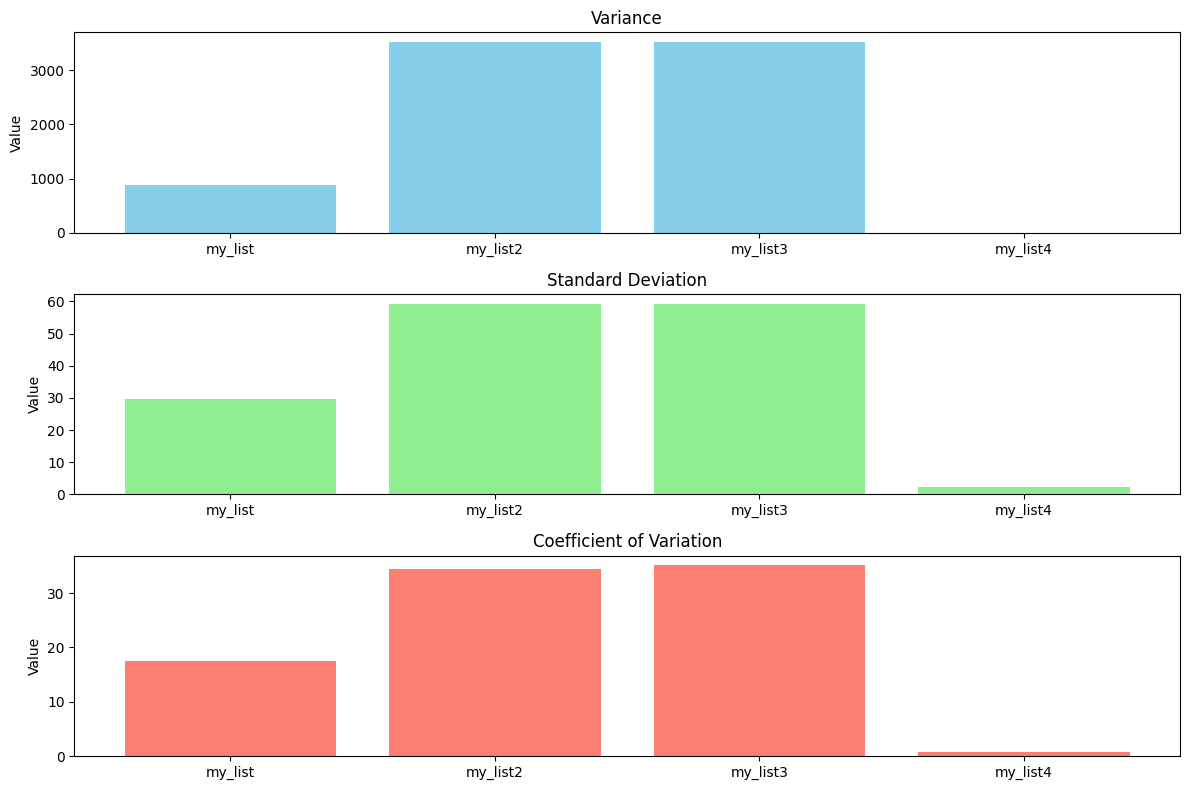

In [59]:
# Wykresy
plt.figure(figsize=(12, 8))

# Variance
plt.subplot(3, 1, 1)
plt.bar(df['List'], df['Variance'], color='skyblue')
plt.title('Variance')
plt.ylabel('Value')

# Stdev
plt.subplot(3, 1, 2)
plt.bar(df['List'], df['Stdev'], color='lightgreen')
plt.title('Standard Deviation')
plt.ylabel('Value')

# Coefficient of Variation
plt.subplot(3, 1, 3)
plt.bar(df['List'], df['Coefficient of variation'], color='salmon')
plt.title('Coefficient of Variation')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [68]:
bin_w = 0.4
index = range(len(df))
index

range(0, 4)

Text(0.5, 1.0, 'Variance vs Stdev vs Coefficient of variation')

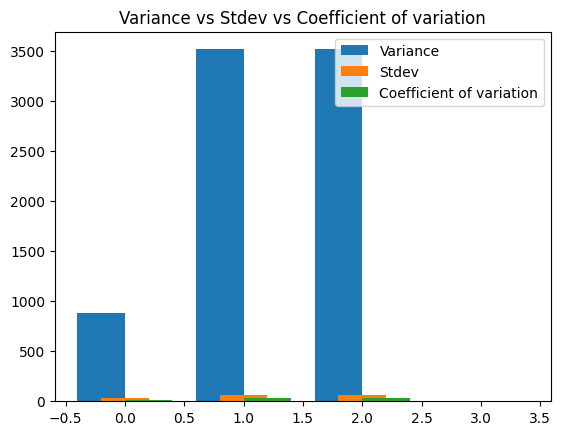

In [70]:
fig,ax = plt.subplots()
ax.bar([i - bin_w/2 for i in index], df['Variance'], width = bin_w, label = 'Variance')
ax.bar([i for i in index], df['Stdev'], width = bin_w, label = 'Stdev')
ax.bar([i + bin_w/2 for i in index], df['Coefficient of variation'], width = bin_w, label = 'Coefficient of variation')
plt.legend()
plt.title('Variance vs Stdev vs Coefficient of variation')